In [1]:
import sys
sys.path.insert(0, '/home/ldoyle/packages')
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from glob import glob

In [6]:
direc = "/home/ldoyle/notebooks/ensembleSINDyArrays_30_run2/"
file_list = glob(direc+"*")

In [7]:
len(file_list)

74

In [8]:
def printEnsemble(coeff_arr, features, include_std=False,cut_off = 1e-3, median= False):
    if median:
        coefs = np.median(coeff_arr, axis=0)
    else:
        coefs = np.mean(coeff_arr, axis=0)
    if include_std:
        stds = np.std(coeff_arr, axis = 0)
        std_str = "St. Dev.:  "
    above_cut_off = np.argwhere(np.abs(coefs)>cut_off).flatten()
#     features =  model.get_feature_names()
    equation_str= "(x0)' = "
    for count, val in enumerate(above_cut_off):
        if count >0:
            equation_str+=" + "
        equation_str+= "{0:.6f}".format(coefs[val])
        equation_str+= " "+features[val]
        if include_std:
            if count >0:
                std_str+=" , "
            std_str+=features[val]+": "
            std_str+= "{0:.6f}".format(stds[val])
        
    print(equation_str)
    if include_std:
        print(std_str)

In [9]:
feats = ['1',
 'x0',
 'x0x0',
 'x0_1',
 'x0_11',
 'x0_111',
 'x0_1111',
 'x0x0_1',
 'x0x0x0_1',
 'x0x0_11',
 'x0x0x0_11',
 'x0x0_111',
 'x0x0x0_111',
 'x0x0_1111',
 'x0x0x0_1111']

In [19]:
for val in file_list[:10]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True)


 File Name 021-11-01T2311_unfiltered_thresh_1.00E-01.npy
(x0)' = 0.638855 x0_1 + 0.351240 x0_111
St. Dev.:  x0_1: 0.026676 , x0_111: 0.021074

 File Name 021-11-01T2311_unfiltered_thresh_1.00E-02.npy
(x0)' = 0.623454 x0_1 + 0.340751 x0_111 + 0.010573 x0x0_1 + 0.009989 x0x0x0_1 + -0.001578 x0x0x0_11 + -0.002500 x0x0_111 + 0.008288 x0x0x0_111
St. Dev.:  x0_1: 0.038607 , x0_111: 0.030497 , x0x0_1: 0.025683 , x0x0x0_1: 0.015504 , x0x0x0_11: 0.010555 , x0x0_111: 0.019073 , x0x0x0_111: 0.012779

 File Name 021-11-01T2311_unfiltered_thresh_5.00E-03.npy
(x0)' = -0.001653 x0 + -0.002112 x0x0 + 0.634725 x0_1 + 0.005511 x0_11 + 0.352231 x0_111 + 0.001029 x0_1111 + 0.014202 x0x0_1 + 0.006591 x0x0x0_1 + -0.012187 x0x0_11 + -0.004372 x0x0x0_11 + 0.002813 x0x0_111 + 0.004156 x0x0x0_111 + -0.003395 x0x0_1111 + -0.001167 x0x0x0_1111
St. Dev.:  x0: 0.005138 , x0x0: 0.005046 , x0_1: 0.030754 , x0_11: 0.037173 , x0_111: 0.023249 , x0_1111: 0.011948 , x0x0_1: 0.026545 , x0x0x0_1: 0.018552 , x0x0_11: 0.027

In [18]:
for val in file_list[10:20]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True)


 File Name 021-11-01T2311_normal_thresh_1.00E-01.npy
(x0)' = 0.681042 x0_1 + 0.317011 x0_111
St. Dev.:  x0_1: 0.037598 , x0_111: 0.026310

 File Name 021-11-01T2311_normal_thresh_5.00E-02.npy
(x0)' = 0.653068 x0_1 + 0.297603 x0_111 + -0.002647 x0x0_1
St. Dev.:  x0_1: 0.095776 , x0_111: 0.080338 , x0x0_1: 0.014253

 File Name 021-11-01T2311_normal_thresh_1.00E-02.npy
(x0)' = 0.692372 x0_1 + 0.001683 x0_11 + 0.331492 x0_111 + 0.001356 x0_1111 + 0.001451 x0x0_1 + -0.007820 x0x0x0_1 + -0.008621 x0x0_11 + 0.002884 x0x0x0_11 + 0.003292 x0x0_111 + -0.004932 x0x0x0_111 + -0.002514 x0x0_1111 + 0.001056 x0x0x0_1111
St. Dev.:  x0_1: 0.043508 , x0_11: 0.051149 , x0_111: 0.033053 , x0_1111: 0.015380 , x0x0_1: 0.028254 , x0x0x0_1: 0.021424 , x0x0_11: 0.028574 , x0x0x0_11: 0.022663 , x0x0_111: 0.017509 , x0x0x0_111: 0.012434 , x0x0_1111: 0.009560 , x0x0x0_1111: 0.006904

 File Name 021-11-01T2311_normal_thresh_5.00E-03.npy
(x0)' = 0.702590 x0_1 + 0.009512 x0_11 + 0.329134 x0_111 + 0.002075 x0_1111 +

In [20]:
for val in file_list[20:30]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=True)


 File Name 021-11-02T0511_normal_thresh_1.00E-01.npy
(x0)' = 0.687504 x0_1 + 0.325550 x0_111
St. Dev.:  x0_1: 0.056823 , x0_111: 0.035060

 File Name 021-11-02T0511_normal_thresh_5.00E-02.npy
(x0)' = 0.687487 x0_1 + 0.322207 x0_111
St. Dev.:  x0_1: 0.054389 , x0_111: 0.035274

 File Name 021-11-02T0511_normal_thresh_1.00E-02.npy
(x0)' = 0.690545 x0_1 + 0.333841 x0_111
St. Dev.:  x0_1: 0.049016 , x0_111: 0.032168

 File Name 021-11-02T0511_normal_thresh_5.00E-03.npy
(x0)' = 0.692879 x0_1 + 0.322203 x0_111 + 0.008386 x0x0_1 + -0.007434 x0x0x0_1
St. Dev.:  x0_1: 0.032494 , x0_111: 0.020008 , x0x0_1: 0.028009 , x0x0x0_1: 0.017579

 File Name 021-11-02T0511_normal_thresh_1.00E-03.npy
(x0)' = 0.705895 x0_1 + -0.012812 x0_11 + 0.326347 x0_111 + -0.004646 x0_1111 + 0.011943 x0x0_1 + -0.002516 x0x0x0_1 + 0.010090 x0x0_11 + 0.008767 x0x0_111 + 0.002864 x0x0_1111
St. Dev.:  x0_1: 0.036877 , x0_11: 0.045024 , x0_111: 0.021761 , x0_1111: 0.016080 , x0x0_1: 0.030066 , x0x0x0_1: 0.027339 , x0x0_11: 

In [13]:
for val in file_list[30:40]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2311_smoothed_rad_4_thresh_1.00E-01.npy
(x0)' = 0.996040 x0_1
St. Dev.:  x0_1: 0.000760

 File Name 021-11-01T2311_smoothed_rad_4_thresh_5.00E-02.npy
(x0)' = 0.996909 x0_1 + 0.085086 x0_111 + 0.063540 x0x0x0_111
St. Dev.:  x0_1: 0.000569 , x0_111: 0.006322 , x0x0x0_111: 0.005409

 File Name 021-11-01T2311_smoothed_rad_4_thresh_1.00E-02.npy
(x0)' = 0.996758 x0_1 + 0.084410 x0_111 + -0.002016 x0x0_111 + 0.063353 x0x0x0_111
St. Dev.:  x0_1: 0.000533 , x0_111: 0.008096 , x0x0_111: 0.005160 , x0x0x0_111: 0.005113

 File Name 021-11-01T2311_smoothed_rad_4_thresh_3.00E-03.npy
(x0)' = 0.996908 x0_1 + -0.001617 x0_11 + 0.084498 x0_111 + -0.001531 x0x0_111 + 0.062920 x0x0x0_111
St. Dev.:  x0_1: 0.000473 , x0_11: 0.004257 , x0_111: 0.005031 , x0x0_111: 0.005850 , x0x0x0_111: 0.005402

 File Name 021-11-01T2311_smoothed_rad_4_thresh_1.00E-03.npy
(x0)' = 0.995355 x0_1 + 0.083406 x0_111 + 0.001831 x0x0x0_1 + 0.001224 x0x0x0_11 + -0.002048 x0x0_111 + 0.068377 x0x0x0_111
St. Dev.

In [14]:
for val in file_list[40:50]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2321_smoothed_rad_4_thresh_1.00E-03.npy
(x0)' = 0.995662 x0_1 + 0.095974 x0_111 + 0.001554 x0x0x0_1 + 0.069329 x0x0x0_111
St. Dev.:  x0_1: 0.000931 , x0_111: 0.007284 , x0x0x0_1: 0.000504 , x0x0x0_111: 0.006948

 File Name 021-11-01T2321_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.995808 x0_1 + 0.096971 x0_111 + 0.001548 x0x0x0_1 + 0.002318 x0x0_111 + 0.068931 x0x0x0_111
St. Dev.:  x0_1: 0.000780 , x0_111: 0.007374 , x0x0x0_1: 0.000403 , x0x0_111: 0.006042 , x0x0x0_111: 0.006979

 File Name 021-11-02T0511_smoothed_rad_4_thresh_1.00E-01.npy
(x0)' = 0.996479 x0_1 + 0.047206 x0_111
St. Dev.:  x0_1: 0.000960 , x0_111: 0.062181

 File Name 021-11-02T0511_smoothed_rad_4_thresh_5.00E-02.npy
(x0)' = 0.997115 x0_1 + 0.107292 x0_111 + 0.042477 x0x0x0_111
St. Dev.:  x0_1: 0.000579 , x0_111: 0.012091 , x0x0x0_111: 0.028284

 File Name 021-11-02T0511_smoothed_rad_4_thresh_1.00E-02.npy
(x0)' = 0.997153 x0_1 + 0.101955 x0_111 + 0.057126 x0x0x0_111
St. Dev.:  x0_1: 0.000629 , x0

In [15]:
for val in file_list[50:60]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-02T2311_smoothed_rad_4_thresh_1.00E-02.npy
(x0)' = 0.998012 x0_1 + 0.179145 x0_111 + 0.060953 x0x0x0_111 + -0.001358 x0x0x0_1111
St. Dev.:  x0_1: 0.000685 , x0_111: 0.010933 , x0x0x0_111: 0.011877 , x0x0x0_1111: 0.005991

 File Name 021-11-02T2311_smoothed_rad_4_thresh_3.00E-03.npy
(x0)' = 0.998165 x0_1 + -0.001359 x0_11 + 0.179239 x0_111 + 0.001599 x0x0_111 + 0.062692 x0x0x0_111
St. Dev.:  x0_1: 0.000713 , x0_11: 0.005037 , x0_111: 0.010714 , x0x0_111: 0.010060 , x0x0x0_111: 0.011221

 File Name 021-11-02T2311_smoothed_rad_4_thresh_1.00E-03.npy
(x0)' = 0.996840 x0_1 + 0.174486 x0_111 + 0.001406 x0x0x0_1 + 0.070986 x0x0x0_111 + 0.002623 x0x0x0_1111
St. Dev.:  x0_1: 0.000787 , x0_111: 0.010556 , x0x0x0_1: 0.000591 , x0x0x0_111: 0.011467 , x0x0x0_1111: 0.008656

 File Name 021-11-02T2311_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.996836 x0_1 + 0.001018 x0_11 + 0.174524 x0_111 + 0.001379 x0x0x0_1 + 0.003681 x0x0_111 + 0.067156 x0x0x0_111 + 0.001764 x0x0x0_1111
St. Dev

In [16]:
for val in file_list[60:74]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,include_std=True, median=False)


 File Name 021-11-01T2321_smoothed_rad_10_thresh_3.00E-03.npy
(x0)' = 0.997748 x0_1
St. Dev.:  x0_1: 0.000177

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-03.npy
(x0)' = 0.996794 x0_1 + -0.001395 x0_111
St. Dev.:  x0_1: 0.000766 , x0_111: 0.000084

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-04.npy
(x0)' = 0.996458 x0_1 + -0.001383 x0_111 + 0.001245 x0x0x0_1
St. Dev.:  x0_1: 0.000347 , x0_111: 0.000096 , x0x0x0_1: 0.000238

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-05.npy
(x0)' = 0.996522 x0_1 + -0.001365 x0_111 + 0.001193 x0x0x0_1
St. Dev.:  x0_1: 0.000315 , x0_111: 0.000122 , x0x0x0_1: 0.000212

 File Name 021-11-02T0511_smoothed_rad_10_thresh_1.00E-02.npy
(x0)' = 0.997881 x0_1
St. Dev.:  x0_1: 0.000162

 File Name 021-11-02T0511_smoothed_rad_10_thresh_3.00E-03.npy
(x0)' = 0.997880 x0_1
St. Dev.:  x0_1: 0.000200

 File Name 021-11-02T0511_smoothed_rad_10_thresh_1.00E-03.npy
(x0)' = 0.997446 x0_1 + -0.001356 x0_111
St. Dev.:  x0_1: 0.000652 , x0_111

In [33]:
# working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")[:,::10]
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_4_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T232114Z.npy")
# working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_10_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")

scaler_val = np.std(working_dat)
working_dat = working_dat/scaler_val
# working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)

In [34]:
dt=1.
dx=1.

In [35]:
# differ = ps.differentiation.SmoothedFiniteDifference()
ut = ps.differentiation.SmoothedFiniteDifference(d=1, axis=1,order=4,is_uniform=True,
                         drop_endpoints=False)._differentiate(working_dat, dt)
ux = ps.differentiation.SmoothedFiniteDifference(d=1, axis=0,order=4,is_uniform=True,
                         drop_endpoints=False)._differentiate(working_dat, dx)
uxx = ps.differentiation.SmoothedFiniteDifference(d=2, axis=0,order=4,is_uniform=True,
                          drop_endpoints=False)._differentiate(working_dat, dx)
uxxx = ps.differentiation.SmoothedFiniteDifference(d=3, axis=0,order=4,is_uniform=True,
                           drop_endpoints=False)._differentiate(working_dat, dx)
uxxxx = ps.differentiation.SmoothedFiniteDifference(d=4, axis=0,
                            drop_endpoints=False)._differentiate(working_dat, dx)

In [30]:
working_dat.shape

(5000, 6000)

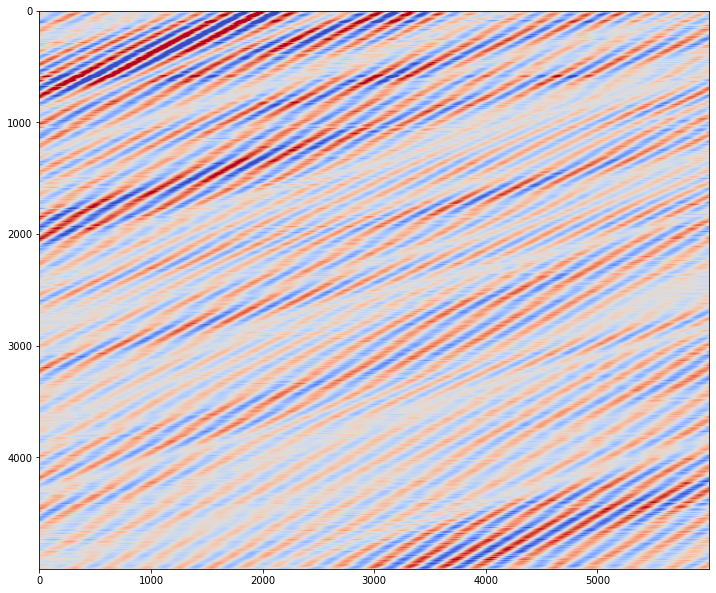

In [36]:
dudt = 0.6369*ux  + 0.3017 * uxxx  -0.0161  *(working_dat**2) * ux  + -0.0070 * (working_dat**2) *uxxx # the GOODIE
dudt = 0.996 *ux  + 0.091 * uxxx  +0.002   *(working_dat**2) * ux  +0.068 * (working_dat**2) *uxxx 

# dudt = 0.9954 *ux + 0.0843 *uxxx + 0.0017 * (working_dat**2) *ux + 0.0015 * (working_dat) *uxxx + 0.0686 * (working_dat**2) *uxxx
# dudt = 0.7016 *ux + 0.3356 *uxxx -0.0149 *(working_dat**2) * ux -0.0026 *(working_dat**2) * uxxx
plt.figure(figsize=(12,12))
plt.imshow(dudt,vmin=-0.1,vmax=0.1,cmap="coolwarm")
plt.show()

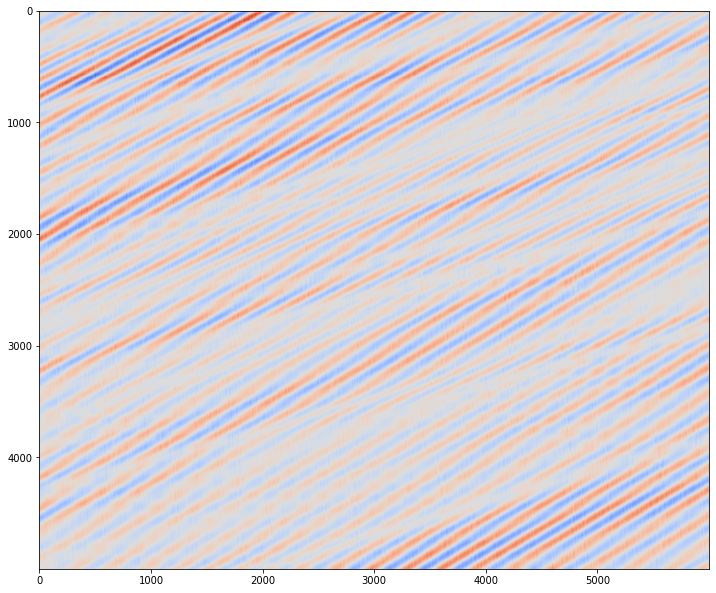

In [38]:
plt.figure(figsize=(12,12))
plt.imshow(ut,vmin=-0.1,vmax=0.1,cmap="coolwarm")
plt.show()

In [13]:
np.save("custom_deriv_discrepency_2.npy",ut-dudt)

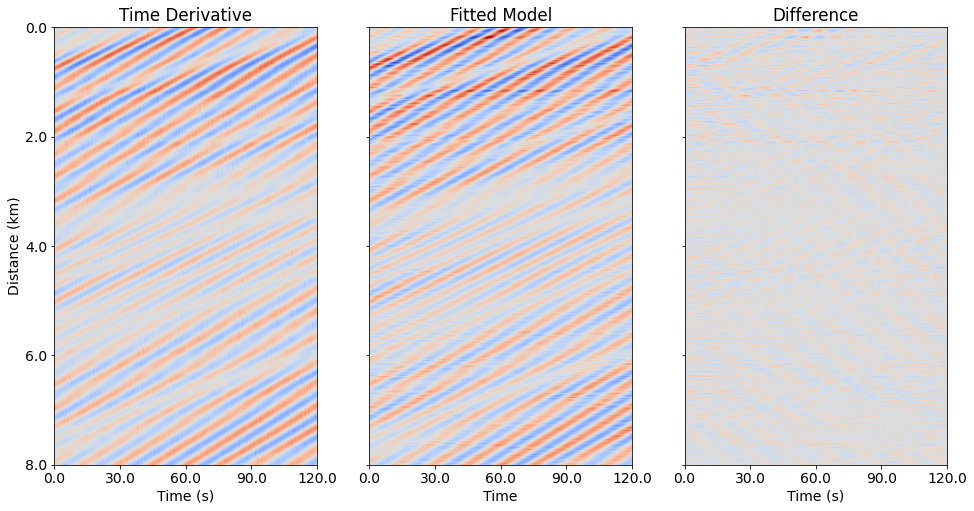

In [27]:
# data2 = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*data[7500:12500,:]*1e6
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=1, ncols=3,figsize = (16, 12),sharey=True)
ax[0].imshow(ut[:4000,:2400],vmin=-0.08,vmax=0.08,cmap="coolwarm")
ax[1].imshow(dudt[:4000,:2400],vmin=-0.08,vmax=0.08, cmap="coolwarm")
ax[2].imshow((dudt-ut)[:4000,:2400],vmin=-0.08,vmax=0.08, cmap="coolwarm")

ax[0].set_yticks(np.linspace(0, 4000, 5),
            (2/1000)*np.linspace(0, 4000, 5))
ax[0].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))
ax[0].set_title('Time Derivative')
ax[0].set_xlabel("Time (s)",size=14)
ax[0].set_ylabel("Distance (km)",size=14)
ax[1].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))
ax[1].set_title('Fitted Model')
ax[1].set_xlabel("Time",size=14)
ax[2].set_title('Difference')
ax[2].set_xlabel("Time (s)",size=14)
ax[2].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))

plt.show()

In [133]:
np.mean(np.abs(ux-uxxx))

0.025895398320470584

In [135]:
np.mean(((dudt-ut)/ut))

0.1592038946401535

In [134]:
np.amax(np.abs(dudt-ut))

0.04702195469331445

In [132]:
np.amax(np.abs(ut))

0.07754741948528665

In [12]:
np.mean(np.abs(dudt-ut))/np.mean(np.abs(ut))

0.805771353942145